# example_classification 
- Basic example usage to process a velocity field and return the usability score (softmax 0-1 where 1 is definitely use).

In [1]:
# needed imports
import numpy as np
import matplotlib.pyplot as plt
import data_prep
import keras

# imports specific to loading MaNGA data here.
import os
from astropy.io import fits

### Loading in a random velocity field in MaNGA data.
- Plotting raw data
- Using function to process data re-scales using opencv (cv2) and normalises to [-1, 1] range.
- Plotting normalised format

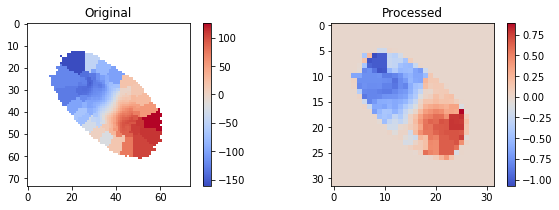

In [2]:
plateifu = '10001-12705'
data_dir = '/Users/chrisduckworth/projects/ML_portfolio/kin_mis_classification/data/VOR10-GAU-MILESHC/'

file_name = 'manga-' + plateifu + '-MAPS-VOR10-MILESHC-MILESHC.fits.gz'
file_path = os.path.join(data_dir, plateifu.split("-")[0], 
                         plateifu.split("-")[1], file_name)

hdu = fits.open(file_path)
smask_ext = hdu['STELLAR_VEL'].header['QUALDATA']
velocity_field = np.ma.MaskedArray(hdu['STELLAR_VEL'].data, mask = hdu[smask_ext].data > 0)

# subplot showing original image
fig, ax = plt.subplots(1,2, figsize=(10, 3))
im_ori = ax[0].imshow(velocity_field, cmap='coolwarm')
ax[0].set_title('Original')
fig.colorbar(im_ori, ax=ax[0])

# returning processed velocity field and plotting
velocity_field = data_prep.process_velocity_field(velocity_field, shape=(32, 32))

im_pro = ax[1].imshow(velocity_field, cmap='coolwarm')
ax[1].set_title('Processed')
fig.colorbar(im_pro, ax=ax[1])
plt.show()

### Loading in trained model and printing summary.

In [3]:
model = keras.models.load_model('../fit-model/optimal_FCN_50epoch_ReduceLRonPlateau/')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 80)                10320     
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0

### Using model to make preditions (i.e can we use this velocity field)

In [10]:
# adding dimension for model input
predict = model.predict( np.array([velocity_field,]) )[0]

print('This velocity field scores {:2.2} in terms of usability. Looks good to me!'.format(predict[0]))

This velocity field scores 0.86 in terms of usability. Looks good to me!
